In [76]:
import numpy as np
from DHAM import Build_Matrices
from DHAM import Optimize_Dhamed
from DHAM import DHAM
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy.optimize import minimize

In [77]:
Temp = 303.15
with open('px.dat') as f:
    px = [line.rstrip() for line in f]

In [78]:
nbins = 200
lag = 245

states = np.linspace(0, 40.0, nbins)

Biasing_Pot = 5000*0.00239
trj_total=[]
count = 0
for i in tqdm(px):
    print(np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10)))
    if count == 0:
        trj_total = np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10))
    else:
        trj_total = np.vstack((trj_total, np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10))))
    count += 1


trj_total = np.asarray(trj_total) 
trj_digitized = np.digitize(trj_total[:, :], states)
sumtr, trvec = Build_Matrices.count_transitions(trj_digitized, nbins, lag, endpt=None)

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_374095/3976246017.py:10: SyntaxWarning: invalid escape sequence '\s'
  print(np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10)))
/tmp/ipykernel_374095/3976246017.py:12: SyntaxWarning: invalid escape sequence '\s'
  trj_total = np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10))
/tmp/ipykernel_374095/3976246017.py:14: SyntaxWarning: invalid escape sequence '\s'
  trj_total = np.vstack((trj_total, np.abs(np.asarray(pd.read_table(i, skiprows=17, sep='\s+', header=None)[1]*10))))
  1%|▌                                           | 1/81 [00:00<00:25,  3.19it/s]

[39.5855 39.5773 39.6034 ... 39.362  39.4592 39.4449]


  2%|█                                           | 2/81 [00:00<00:24,  3.18it/s]

[38.585  38.5456 38.5652 ... 38.776  38.716  38.7504]


  4%|█▋                                          | 3/81 [00:00<00:24,  3.19it/s]

[37.5853 37.5772 37.5572 ... 37.508  37.5372 37.5659]


  5%|██▏                                         | 4/81 [00:01<00:23,  3.22it/s]

[36.5857 36.6036 36.6091 ... 36.6411 36.585  36.4916]


  6%|██▋                                         | 5/81 [00:01<00:23,  3.22it/s]

[35.5856 35.5789 35.5739 ... 35.471  35.3774 35.3383]


  7%|███▎                                        | 6/81 [00:01<00:23,  3.20it/s]

[34.5856 34.6389 34.6886 ... 34.7158 34.6698 34.6366]


  9%|███▊                                        | 7/81 [00:02<00:23,  3.20it/s]

[33.5845 33.5824 33.5742 ... 33.6421 33.6478 33.6432]


 10%|████▎                                       | 8/81 [00:02<00:22,  3.19it/s]

[32.5852 32.5642 32.585  ... 32.2779 32.2127 32.1952]


 11%|████▉                                       | 9/81 [00:02<00:22,  3.15it/s]

[31.5846 31.5738 31.6663 ... 31.4797 31.4914 31.437 ]


 12%|█████▎                                     | 10/81 [00:03<00:22,  3.13it/s]

[30.5857 30.5715 30.699  ... 30.7269 30.7629 30.7747]


 14%|█████▊                                     | 11/81 [00:03<00:22,  3.11it/s]

[29.5845 29.57   29.4774 ... 29.7417 29.7272 29.6955]


 15%|██████▎                                    | 12/81 [00:03<00:22,  3.09it/s]

[28.5852 28.625  28.7069 ... 28.512  28.5713 28.6106]


 16%|██████▉                                    | 13/81 [00:04<00:22,  3.07it/s]

[27.5845 27.597  27.5955 ... 27.6095 27.6318 27.7428]


 17%|███████▍                                   | 14/81 [00:04<00:21,  3.06it/s]

[26.5853 26.5911 26.5717 ... 27.033  26.9722 26.9699]


 19%|███████▉                                   | 15/81 [00:04<00:21,  3.05it/s]

[25.5862 25.6089 25.7088 ... 25.4294 25.3259 25.2149]


 20%|████████▍                                  | 16/81 [00:05<00:21,  3.05it/s]

[24.5851 24.6324 24.7463 ... 24.258  24.3112 24.4339]


 21%|█████████                                  | 17/81 [00:05<00:21,  3.01it/s]

[23.5852 23.543  23.4725 ... 23.9254 24.0418 24.0165]


 22%|█████████▌                                 | 18/81 [00:05<00:20,  3.01it/s]

[22.585  22.5462 22.5394 ... 22.3502 22.3446 22.36  ]


 23%|██████████                                 | 19/81 [00:06<00:20,  3.00it/s]

[21.5846 21.5176 21.4858 ... 21.3528 21.3019 21.4608]


 25%|██████████▌                                | 20/81 [00:06<00:20,  2.91it/s]

[20.5846 20.5707 20.5631 ... 20.2258 20.2146 20.2993]


 26%|███████████▏                               | 21/81 [00:06<00:20,  2.88it/s]

[19.5857 19.5535 19.4869 ... 19.3954 19.3571 19.3421]


 27%|███████████▋                               | 22/81 [00:07<00:20,  2.87it/s]

[18.5849 18.5712 18.5047 ... 18.5417 18.6282 18.6093]


 28%|████████████▏                              | 23/81 [00:07<00:20,  2.86it/s]

[17.5855 17.6567 17.788  ... 17.7715 17.649  17.7117]


 30%|████████████▋                              | 24/81 [00:07<00:20,  2.84it/s]

[16.5862 16.5536 16.4973 ... 16.0937 16.1216 16.2062]


 31%|█████████████▎                             | 25/81 [00:08<00:19,  2.82it/s]

[15.5855 15.6182 15.6653 ... 15.7168 15.6152 15.4858]


 32%|█████████████▊                             | 26/81 [00:08<00:19,  2.80it/s]

[14.5848 14.6686 14.7915 ... 15.2396 15.2883 15.1583]


 33%|██████████████▎                            | 27/81 [00:09<00:19,  2.78it/s]

[13.585  13.5935 13.6205 ... 13.5253 13.4712 13.4436]


 35%|██████████████▊                            | 28/81 [00:09<00:19,  2.78it/s]

[12.585  12.5905 12.5382 ... 12.7633 12.7711 12.7239]


 36%|███████████████▍                           | 29/81 [00:09<00:18,  2.78it/s]

[11.5856 11.5954 11.6089 ... 11.6742 11.659  11.7107]


 37%|███████████████▉                           | 30/81 [00:10<00:18,  2.79it/s]

[10.5855 10.5724 10.476  ... 10.7695 10.728  10.6945]


 38%|████████████████▍                          | 31/81 [00:10<00:17,  2.80it/s]

[9.5851  9.58853 9.56843 ... 9.58808 9.62695 9.61018]
[8.5862  8.53908 8.42647 ... 8.17795 8.25365 8.30145]


 41%|█████████████████▌                         | 33/81 [00:11<00:17,  2.80it/s]

[7.58495 7.58112 7.52009 ... 7.7785  7.73967 7.6073 ]
[6.58561 6.56173 6.48958 ... 6.48573 6.60621 6.69184]


 42%|██████████████████                         | 34/81 [00:11<00:16,  2.80it/s]

[5.58579 5.56965 5.58811 ... 5.85327 5.62604 5.44073]


 43%|██████████████████▌                        | 35/81 [00:11<00:16,  2.78it/s]

[4.58484 4.55935 4.46963 ... 4.6129  4.62711 4.58531]


 44%|███████████████████                        | 36/81 [00:12<00:16,  2.77it/s]

[3.58538 3.57043 3.47602 ... 3.58291 3.62419 3.61492]


 46%|███████████████████▋                       | 37/81 [00:12<00:15,  2.77it/s]

[2.58584 2.55259 2.53318 ... 2.00091 2.0769  2.22412]


 47%|████████████████████▏                      | 38/81 [00:12<00:15,  2.76it/s]

[1.58508 1.61997 1.64808 ... 1.86056 1.83389 1.65914]


 48%|████████████████████▋                      | 39/81 [00:13<00:15,  2.76it/s]

[0.586093 0.601913 0.617274 ... 0.981751 0.971635 0.924792]


 49%|█████████████████████▏                     | 40/81 [00:13<00:15,  2.72it/s]

[0.414501 0.381575 0.358473 ... 0.626391 0.502619 0.34884 ]


 51%|█████████████████████▊                     | 41/81 [00:14<00:15,  2.62it/s]

[1.41416 1.43724 1.42951 ... 1.35976 1.21915 1.15435]


 52%|██████████████████████▎                    | 42/81 [00:14<00:15,  2.57it/s]

[2.41396 2.38382 2.26297 ... 2.72742 2.77158 2.78105]


 53%|██████████████████████▊                    | 43/81 [00:14<00:15,  2.53it/s]

[3.41592 3.42507 3.4511  ... 3.62504 3.67553 3.63304]


 54%|███████████████████████▎                   | 44/81 [00:15<00:14,  2.50it/s]

[4.41464 4.40092 4.34583 ... 4.63801 4.57509 4.41362]


 56%|███████████████████████▉                   | 45/81 [00:15<00:14,  2.48it/s]

[5.41517 5.36853 5.19286 ... 5.13214 5.06824 5.07577]


 57%|████████████████████████▍                  | 46/81 [00:16<00:14,  2.46it/s]

[6.41505 6.3515  6.1996  ... 6.05824 5.90044 5.75988]


 58%|████████████████████████▉                  | 47/81 [00:16<00:13,  2.44it/s]

[7.41461 7.37277 7.34277 ... 7.33013 7.40948 7.42581]


 59%|█████████████████████████▍                 | 48/81 [00:17<00:13,  2.44it/s]

[8.41491 8.47552 8.5804  ... 8.63423 8.68512 8.77264]


 60%|██████████████████████████                 | 49/81 [00:17<00:13,  2.45it/s]

[9.41349 9.45818 9.49138 ... 9.26205 9.35244 9.35687]


 62%|██████████████████████████▌                | 50/81 [00:17<00:12,  2.46it/s]

[10.4142 10.3724 10.2739 ... 10.4611 10.4338 10.514 ]


 63%|███████████████████████████                | 51/81 [00:18<00:12,  2.47it/s]

[11.4145 11.4338 11.5055 ... 11.2178 11.2811 11.4046]


 64%|███████████████████████████▌               | 52/81 [00:18<00:11,  2.46it/s]

[12.4156 12.3996 12.329  ... 12.6271 12.6736 12.6989]


 65%|████████████████████████████▏              | 53/81 [00:19<00:11,  2.47it/s]

[13.4143 13.4398 13.4282 ... 13.3696 13.4121 13.3888]


 67%|████████████████████████████▋              | 54/81 [00:19<00:10,  2.48it/s]

[14.4151 14.4113 14.4041 ... 14.0452 14.0507 14.0959]


 68%|█████████████████████████████▏             | 55/81 [00:19<00:10,  2.46it/s]

[15.4145 15.4207 15.4559 ... 15.658  15.6839 15.6958]


 69%|█████████████████████████████▋             | 56/81 [00:20<00:10,  2.44it/s]

[16.4142 16.4196 16.3937 ... 16.2822 16.2567 16.3194]


 70%|██████████████████████████████▎            | 57/81 [00:20<00:09,  2.43it/s]

[17.4152 17.4442 17.4749 ... 17.7366 17.6036 17.5901]


 72%|██████████████████████████████▊            | 58/81 [00:21<00:09,  2.44it/s]

[18.4138 18.3874 18.3868 ... 18.5615 18.6998 18.769 ]


 73%|███████████████████████████████▎           | 59/81 [00:21<00:09,  2.44it/s]

[19.4146 19.395  19.3487 ... 19.6119 19.5794 19.5063]


 74%|███████████████████████████████▊           | 60/81 [00:21<00:08,  2.44it/s]

[20.4156 20.4182 20.381  ... 20.7922 20.7341 20.7207]


 75%|████████████████████████████████▍          | 61/81 [00:22<00:08,  2.44it/s]

[21.4149 21.3705 21.321  ... 21.7315 21.8359 21.7757]


 77%|████████████████████████████████▉          | 62/81 [00:22<00:07,  2.43it/s]

[22.415  22.4584 22.5002 ... 22.6211 22.6388 22.6812]


 78%|█████████████████████████████████▍         | 63/81 [00:23<00:07,  2.43it/s]

[23.4155 23.4035 23.3591 ... 23.3803 23.4599 23.5138]


 79%|█████████████████████████████████▉         | 64/81 [00:23<00:07,  2.42it/s]

[24.4145 24.4195 24.467  ... 24.8686 24.8045 24.6814]


 80%|██████████████████████████████████▌        | 65/81 [00:23<00:06,  2.42it/s]

[25.415  25.4137 25.4426 ... 25.1902 25.1633 25.2642]


 81%|███████████████████████████████████        | 66/81 [00:24<00:06,  2.40it/s]

[26.4139 26.3783 26.388  ... 26.245  26.2461 26.2799]


 83%|███████████████████████████████████▌       | 67/81 [00:24<00:05,  2.38it/s]

[27.4144 27.3849 27.3072 ... 27.4235 27.4996 27.5552]


 84%|████████████████████████████████████       | 68/81 [00:25<00:05,  2.36it/s]

[28.4158 28.4858 28.5499 ... 28.223  28.2786 28.3525]


 85%|████████████████████████████████████▋      | 69/81 [00:25<00:05,  2.36it/s]

[29.4142 29.2996 29.2029 ... 29.4737 29.4187 29.2925]


 86%|█████████████████████████████████████▏     | 70/81 [00:26<00:04,  2.35it/s]

[30.4146 30.4151 30.361  ... 30.1784 30.139  30.2111]


 88%|█████████████████████████████████████▋     | 71/81 [00:26<00:04,  2.35it/s]

[31.4149 31.4002 31.3578 ... 31.3522 31.2513 31.3164]


 89%|██████████████████████████████████████▏    | 72/81 [00:26<00:03,  2.32it/s]

[32.4144 32.419  32.4321 ... 32.3909 32.3968 32.4603]


 90%|██████████████████████████████████████▊    | 73/81 [00:27<00:03,  2.31it/s]

[33.415  33.411  33.3431 ... 33.5041 33.5041 33.3721]


 91%|███████████████████████████████████████▎   | 74/81 [00:27<00:03,  2.27it/s]

[34.4158 34.4286 34.4496 ... 34.2085 34.3007 34.2586]


 93%|███████████████████████████████████████▊   | 75/81 [00:28<00:02,  2.27it/s]

[35.4146 35.4041 35.3781 ... 35.6352 35.6522 35.673 ]


 94%|████████████████████████████████████████▎  | 76/81 [00:28<00:02,  2.29it/s]

[36.4147 36.4678 36.5683 ... 36.4638 36.2931 36.1755]


 95%|████████████████████████████████████████▉  | 77/81 [00:29<00:01,  2.28it/s]

[37.415  37.4497 37.4309 ... 37.6262 37.5608 37.5506]


 96%|█████████████████████████████████████████▍ | 78/81 [00:29<00:01,  2.28it/s]

[38.4146 38.3919 38.3689 ... 38.4986 38.4479 38.4143]


 98%|█████████████████████████████████████████▉ | 79/81 [00:30<00:00,  2.26it/s]

[39.4144 39.4121 39.3848 ... 39.6164 39.6383 39.7148]


 99%|██████████████████████████████████████████▍| 80/81 [00:30<00:00,  2.26it/s]

[40.4151 40.4194 40.4981 ... 40.5525 40.7253 40.8828]


100%|███████████████████████████████████████████| 81/81 [00:30<00:00,  2.62it/s]


In [91]:
print(sumtr.shape)

(200, 200)


In [79]:
print(trvec.shape)
print(trvec[30])

(81, 200)
[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      1     71   2173  25251 145219 390004 482457 273703  71838
   8500    519     19      1      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0    

In [80]:
MM = DHAM.Initial_MM(sumtr, trvec, Biasing_Pot, states, trj_total, Temp)

In [81]:
print(MM.shape)
print(MM[-1])

(200, 200)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [82]:
print(np.sum(MM[0]))

1.0


In [92]:
M=MM
d, v = eig(M.T)
mpeq = v[:, np.where(d == np.max(d))[0][0]]
mpeq = mpeq / np.sum(mpeq)
mU2 = -303.15*1.9872041E-3 * np.log(mpeq)
mU2 -= np.min(mU2[:int(len(states))])

In [93]:
print(mU2)

[2.14510034+0.j 1.95939378+0.j 1.8720667 +0.j 1.96531993+0.j
 2.14374344+0.j 2.15460541+0.j 2.01261694+0.j 1.94838322+0.j
 2.02579442+0.j 2.16800099+0.j 2.17522738+0.j 2.06252529+0.j
 2.04125655+0.j 2.1667299 +0.j 2.34351868+0.j 2.41482231+0.j
 2.41942215+0.j 2.51047654+0.j 2.7172921 +0.j 2.96915438+0.j
 3.03610322+0.j 2.97142717+0.j 3.01153381+0.j 3.20812677+0.j
 3.46199767+0.j 3.60459148+0.j 3.6735615 +0.j 3.82328466+0.j
 4.08634852+0.j 4.37180254+0.j 4.50404551+0.j 4.54072117+0.j
 4.65168359+0.j 4.87665545+0.j 5.13579711+0.j 5.25109995+0.j
 5.27852272+0.j 5.41910926+0.j 5.71180829+0.j 6.0413414 +0.j
 6.19237758+0.j 6.2667573 +0.j 6.46791772+0.j 6.82986526+0.j
 7.19452384+0.j 7.26539731+0.j 7.21913329+0.j 7.31448894+0.j
 7.59287765+0.j 7.88000517+0.j 7.92196738+0.j 7.85487596+0.j
 7.87756097+0.j 8.01107643+0.j 8.15242962+0.j 8.09489541+0.j
 7.93356614+0.j 7.83621732+0.j 7.83385573+0.j 7.88735026+0.j
 7.837208  +0.j 7.70812832+0.j 7.67247253+0.j 7.77624543+0.j
 7.90442269+0.j 7.837842

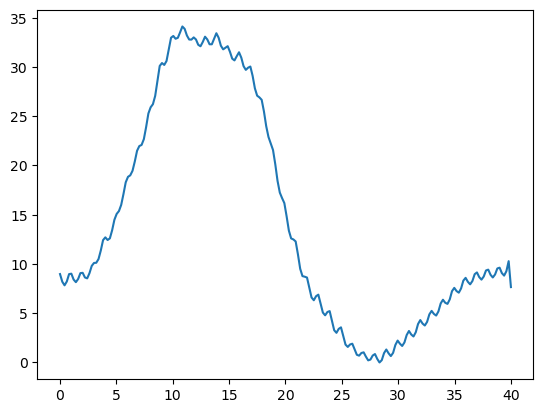

In [94]:
plt.plot(states, mU2*4.184)
plt.show()